# **Data Overview**

The dataset consists of **206,774** records and **11 columns**. Each row contains details about a flight, including the airline, flight codes, times, cities, and ticket prices. Below is a breakdown of the columns:

- **date**: The date when the flight is scheduled (Object type).
- **airline**: The name of the airline operating the flight (Object type).
- **ch_code**: A unique code assigned to the airline (Object type).
- **num_code**: A unique code assigned to each flight (Integer type).
- **dep_time**: Scheduled departure time of the flight (Object type).
- **from**: The city from which the flight departs (Object type).
- **time_taken**: The total flight duration, represented as hours and minutes (Object type).
- **stop**: Indicates whether the flight is non-stop or has layovers (Object type).
- **arr_time**: Scheduled arrival time of the flight (Object type).
- **to**: The city where the flight arrives (Object type).
- **price**: The price of the flight ticket (Object type).

### **Summary**
- **Total Entries**: 206,774
- **Non-Null Values**: All columns contain non-null values, meaning there are no missing data.
- **Data Types**: 
  - **Integer**: 1 column (`num_code`)
  - **Object**: 10 columns (representing categorical or text-based data)
  
### **Memory Usage**
The dataset uses approximately **17.4 MB** of memory.

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import pickle

In [26]:
total_files = total_files = [
    pd.read_csv("./" + file).assign(flight_type=file.replace('.csv', '')) 
    for file in os.listdir("./") if file.endswith(".csv")
]

Data = pd.concat(total_files)

In [85]:
Data.iloc[5]

flight_date        11-02-2022
airline_name          Vistara
airline_code               UK
flight_code               985
departure_time          19:50
departure_city          Delhi
flight_duration       02h 10m
stop_type           non-stop 
arrival_time            22:00
arrival_city           Mumbai
ticket_price           50,264
flight_type          business
Name: 5, dtype: object

In [3]:
Data.shape

(300261, 12)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         300261 non-null  object
 1   airline      300261 non-null  object
 2   ch_code      300261 non-null  object
 3   num_code     300261 non-null  int64 
 4   dep_time     300261 non-null  object
 5   from         300261 non-null  object
 6   time_taken   300261 non-null  object
 7   stop         300261 non-null  object
 8   arr_time     300261 non-null  object
 9   to           300261 non-null  object
 10  price        300261 non-null  object
 11  flight_type  300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


# **Changes to Column Names**

To improve clarity and make the dataset easier to interpret, the following columns were renamed. The new names are more descriptive, making it clear what each column represents:

1. **`date` → `flight_date`**:
   - **Reason**: The original `date` column was too generic. Renaming it to `flight_date` provides a clear indication that this refers to the date of the flight.

2. **`airline` → `airline_name`**:
   - **Reason**: The column originally labeled as `airline` is more clearly understood as the name of the airline. The new name `airline_name` clarifies that it refers to the airline operating the flight.

3. **`ch_code` → `airline_code`**:
   - **Reason**: The original `ch_code` was not immediately obvious in its meaning. Renaming it to `airline_code` gives a clearer description that it represents the unique code assigned to the airline.

4. **`num_code` → `flight_code`**:
   - **Reason**: The `num_code` refers to the flight code, which is a unique identifier for each flight. Changing it to `flight_code` makes the purpose of the column more intuitive.

5. **`dep_time` → `departure_time`**:
   - **Reason**: The original name `dep_time` is an abbreviation that might not be clear to all users. The new name `departure_time` fully spells out the purpose of the column, which is to show when the flight departs.

6. **`from` → `departure_city`**:
   - **Reason**: The column name `from` was too vague, and it was unclear whether it referred to the departure airport or city. Renaming it to `departure_city` specifies that it refers to the city from which the flight departs.

7. **`time_taken` → `flight_duration`**:
   - **Reason**: The original name `time_taken` was somewhat ambiguous. The new name `flight_duration` better communicates that this column represents the duration of the flight.

8. **`stop` → `stop_type`**:
   - **Reason**: The column `stop` refers to whether a flight has layovers or is non-stop. By renaming it to `stop_type`, it more clearly indicates that it specifies the type of flight stop (e.g., non-stop or with stops).

9. **`arr_time` → `arrival_time`**:
   - **Reason**: Similar to `dep_time`, the name `arr_time` was shortened. Renaming it to `arrival_time` provides full clarity and consistency in naming conventions for both departure and arrival times.

10. **`to` → `arrival_city`**:
    - **Reason**: The original name `to` was ambiguous and could be confused with other meanings. By changing it to `arrival_city`, the purpose of the column is much clearer: it indicates the city or airport where the flight is arriving.

11. **`price` → `ticket_price`**:
    - **Reason**: The column `price` was too generic. Renaming it to `ticket_price` specifies that the price represents the cost of the flight ticket.

In [27]:
Data.rename(columns={
    'date': 'flight_date',
    'airline': 'airline_name',
    'ch_code': 'airline_code',
    'num_code': 'flight_code',
    'dep_time': 'departure_time',
    'from': 'departure_city',
    'time_taken': 'flight_duration',
    'stop': 'stop_type',
    'arr_time': 'arrival_time',
    'to': 'arrival_city',
    'price': 'ticket_price'
}, inplace=True)

In [28]:
Data_Copy = Data.copy()

## **Inferences from `flight_date`**

#### 1. **Flight Count Summary**
- The dataset includes 31 days each for February and March 2022, with a total of 62 days.

#### 2. **Monthly Flight Activity**
- **February**: The average flight count is **3244** with a high variation (std = 2938). The minimum value is **0**, indicating some days with no flights, while the maximum is **6603**.
- **March**: The average flight count is significantly higher at **6441**, with lower variation (std = 149). The minimum value is **6072**, and the maximum is **6633**, showing a consistently higher volume of flights compared to February.

#### 3. **Distribution of Flights**
- **February**: The lower 25% of the data has **0 flights**, suggesting several non-operational days, while the 50th percentile (median) is **4250**.
- **March**: There are no days with **0 flights**, and the 50th percentile (median) is **6495**, reflecting consistent daily flight activity.

#### 4. **Flight Volume Patterns**
- **March** shows a more stable and higher flight volume overall, with almost all days having similar flight counts between **6072** and **6633**.
- **February** displays larger fluctuations, with several days recording no flights, but a few peak days reaching **6603** flights.

year
2022    300261
Name: count, dtype: int64
month     February        March
count    31.000000    31.000000
mean   3244.806452  6441.032258
std    2938.907568   148.701375
min       0.000000  6072.000000
25%       0.000000  6401.500000
50%    4250.000000  6495.000000
75%    6051.000000  6535.500000
max    6603.000000  6633.000000


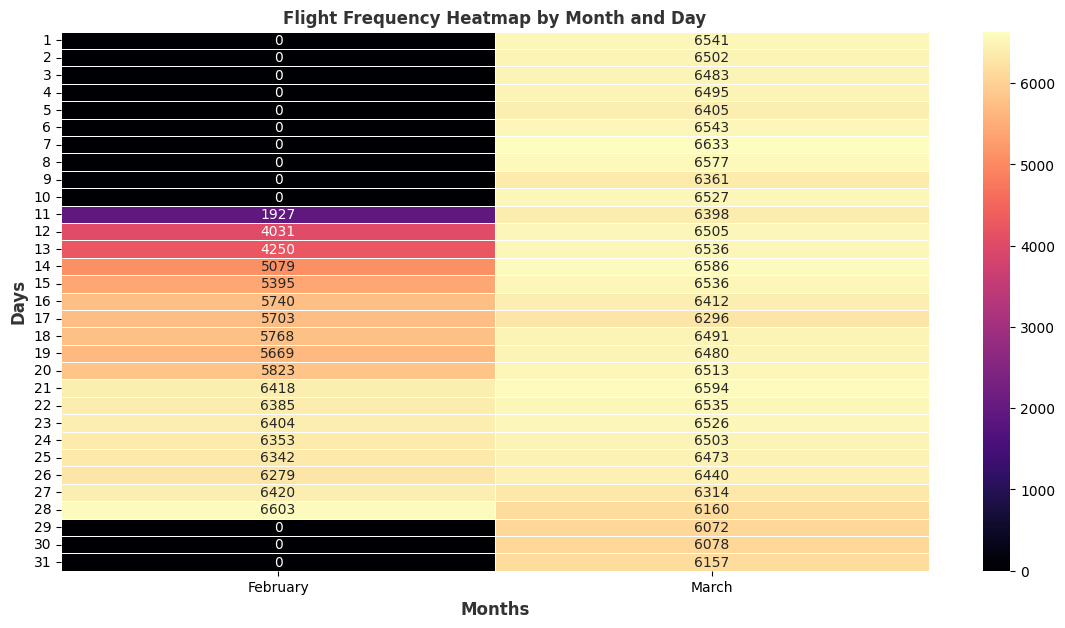

In [29]:
Data_Copy['flight_date'] = pd.to_datetime(Data_Copy['flight_date'], format='%d-%m-%Y')

Data_Copy['year'] = Data_Copy['flight_date'].dt.year
Data_Copy['month'] = Data_Copy['flight_date'].dt.month
Data_Copy['day'] = Data_Copy['flight_date'].dt.day

unique_years = Data_Copy['year'].nunique()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

Data_Copy['month'] = Data_Copy['month'].apply(lambda x: month_names[x - 1])

print(Data_Copy['year'].value_counts())

heatmap_data = Data_Copy.groupby(['month', 'day']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
sb.heatmap(heatmap_data.transpose(), cmap='magma', annot=True, fmt='d', linewidths=.5)

plt.title('Flight Frequency Heatmap by Month and Day', fontsize=12, fontweight='bold', color='#333333')
plt.xlabel('Months',fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Days', fontsize=12, fontweight='bold', color='#333333')

print(heatmap_data.transpose().describe())

plt.show()

## **Inferences from `airline_name`**

#### 1. **Top Airlines by Flight Frequency**
- **Vistara** is the dominant airline in terms of flight frequency, with a significant lead of **127,859** flights.
- **Air India** follows with **80,894** flights, showing a strong presence in the dataset.

#### 2. **Other Major Airlines**
- **Indigo** has **43,120** flights, which places it as a major player, although not as frequent as Vistara or Air India.
- **GO FIRST** and **AirAsia** show moderate flight numbers with **23,177** and **16,098** flights respectively.

#### 3. **Low Frequency Airlines**
- **SpiceJet** recorded **9,011** flights, which is notably lower than the top three airlines.
- **StarAir** and **Trujet** have very low frequencies with only **61** and **41** flights, respectively, indicating either niche operations or limited service areas.

airline_name
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64


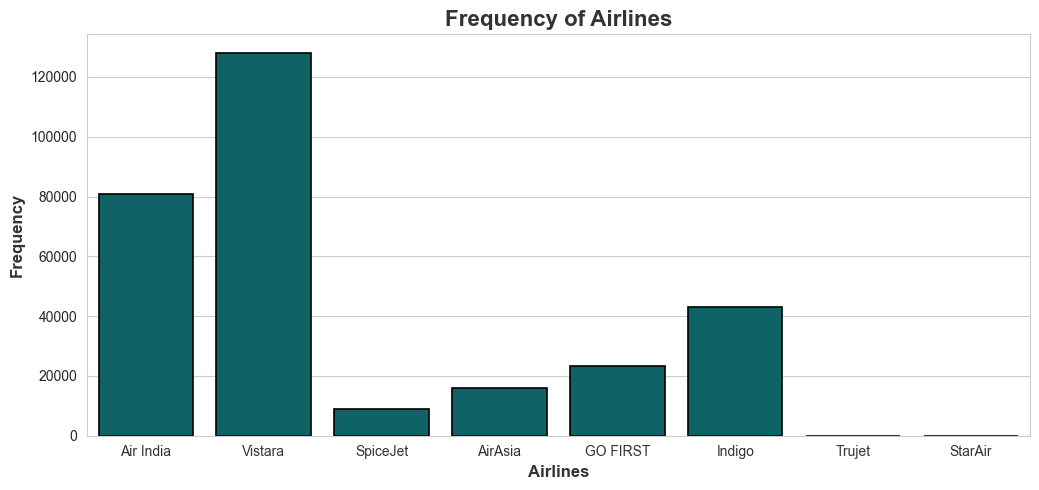

In [30]:
sb.set_style('whitegrid')

plt.figure(figsize=(10.5, 5))
sb.countplot(x='airline_name', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2)

plt.title('Frequency of Airlines', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airlines', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

plt.xticks(fontsize=10, color='#333333')

plt.tight_layout()

print(Data_Copy['airline_name'].value_counts())

plt.show()

## **Inferences from `departure_city`**

#### 1. **Top Departure Cities**
- **Delhi** is the leading departure city with **61,345** flights, making it the most prominent hub for flights in the dataset.
- **Mumbai** follows closely with **60,903** flights, indicating it as another major travel hub.

#### 2. **Other Major Cities**
- **Bangalore** ranks third with **52,106** flights, showing strong flight activity but still trailing Delhi and Mumbai.
- **Kolkata** and **Hyderabad** are also significant departure cities with **46,347** and **40,860** flights, respectively.

#### 3. **Less Frequent Cities**
- **Chennai** has the least number of flights among the listed cities, with **38,700** flights. While still a notable hub, it has lower departure activity compared to the other major cities.

departure_city
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64


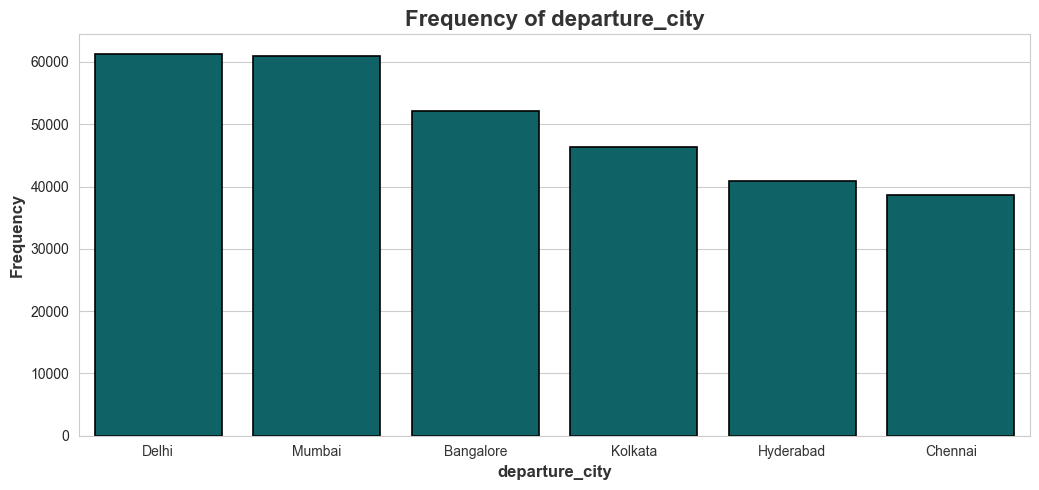

In [31]:
sb.set_style('whitegrid')

plt.figure(figsize=(10.5, 5))
sb.countplot(x='departure_city', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2)

plt.title('Frequency of departure_city', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('departure_city', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

plt.xticks(fontsize=10, color='#333333')

plt.tight_layout()

print(Data_Copy['departure_city'].value_counts())

plt.show()

In [32]:
def add_stop_columns(data):
    """
    Adds 'num_stops' and 'stop_area' columns based on the 'stop_type' column, and corrects stopover names using a dictionary.

    Args:
    data (pd.DataFrame): The DataFrame containing the 'stop_type' column.

    Returns:
    pd.DataFrame: The DataFrame with added 'num_stops' and 'stop_area' columns.
    """
    
    stop_area_dict = {
        'IXU': 'Dibrugarh Airport',
        'IDR': 'Indore Airport',
        'Patna': 'Lok Nayak Jayaprakash Airport',
        'Indore': 'Indore Airport',
        'PAT': 'Patna Airport',
        'MYQ': 'Mysore Airport',
        'Bhubaneswar': 'Biju Patnaik International Airport',
        'KLH': 'Kochi Airport',
        'JGB': 'Jagdalpur Airport',
        'JRG': 'Jorhat Airport',
        'STV': 'Surat Airport',
        'BBI': 'Bhubaneswar Airport',
        'Delhi': 'Indira Gandhi International Airport',
        'Hyderabad': 'Rajiv Gandhi International Airport',
        'IXE': 'Mangalore International Airport',
        'Ranchi': 'Birsa Munda Airport',
        'Raipur': 'Swami Vivekananda International Airport',
        'Chennai': 'Chennai International Airport',
        'Guwahati': 'Lokpriya Gopinath Bordoloi International Airport',
        'Mysore': 'Mysore Airport',
        'Mangalore': 'Mangalore International Airport',
        'Mumbai': 'Chhatrapati Shivaji Maharaj International Airport',
        'Kolkata': 'Netaji Subhas Chandra Bose International Airport',
        'VTZ': 'Visakhapatnam Airport',
        'Nagpur': 'Dr. Babasaheb Ambedkar International Airport',
        'NDC': 'Dibrugarh Airport',
        'RPR': 'Raipur Airport',
        'GOP': 'Gorakhpur Airport',
        'Surat': 'Surat Airport',
        'Lucknow': 'Chaudhary Charan Singh International Airport',
        'NAG': 'Nagpur Airport',
        'Vishakhapatnam': 'Visakhapatnam International Airport',
        'Kolhapur': 'Kolhapur Airport',
        'IXR': 'Ranchi Airport',
        'GAY': 'Gaya International Airport',
        'GAU': 'Lokpriya Gopinath Bordoloi International Airport',
        'HYD': 'Hyderabad International Airport'
    }

    data['num_stops'] = data['stop_type'].apply(lambda x: 0 if 'non-stop' in x else (1 if '1-stop' in x else 2))
    
    data['stop_area'] = data['stop_type'].apply(lambda x: "None" if 'non-stop' in x else 
                                                (x.split("Via")[-1].strip() if 'Via' in x else "None"))
    
    data['stop_area'] = data['stop_area'].map(stop_area_dict).fillna('not defined')
    
    data.loc[data['num_stops'] == 0, 'stop_area'] = "None"
    
    data.drop('stop_type', axis=1, inplace=True)
    
    return data

add_stop_columns(Data_Copy)

,flight_date,airline_name,airline_code,flight_code,departure_time,departure_city,flight_duration,arrival_time,arrival_city,ticket_price,flight_type,year,month,day,num_stops,stop_area
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,20:00,Mumbai,"25,612",business,2022,February,11,0,None
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,21:15,Mumbai,"25,612",business,2022,February,11,0,None
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,20:45,Mumbai,"42,220",business,2022,February,11,1,not defined
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,23:55,Mumbai,"44,450",business,2022,February,11,1,not defined
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,23:55,Mumbai,"46,690",business,2022,February,11,1,not defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,2022-03-31,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,"7,697",economy,2022,March,31,1,not defined
206770,2022-03-31,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,"7,709",economy,2022,March,31,1,not defined
206771,2022-03-31,Vistara,UK,826,12:30,Chennai,20h 35m,09:05,Hyderabad,"8,640",economy,2022,March,31,1,not defined
206772,2022-03-31,Vistara,UK,822,09:45,Chennai,23h 20m,09:05,Hyderabad,"8,640",economy,2022,March,31,1,not defined


## **Inferences from `num_stops`**

#### 1. **Most Common Stop Type**
- **1-stop flights** are the most common, with **250,929** instances. This suggests that most travelers prefer routes with a single stopover.

#### 2. **Non-stop Flights**
- **Non-stop flights** account for **36,044** flights, which is a smaller portion of the total. While they are less frequent, non-stop routes are still significant and likely preferred for convenience.

#### 3. **2+-stop Flights**
- **2+-stop flights** are the least common, with only **13,288** occurrences. This indicates that multi-stop flights are less popular and likely avoided due to longer travel times and inconvenience.

num_stops
1    250929
0     36044
2     13288
Name: count, dtype: int64


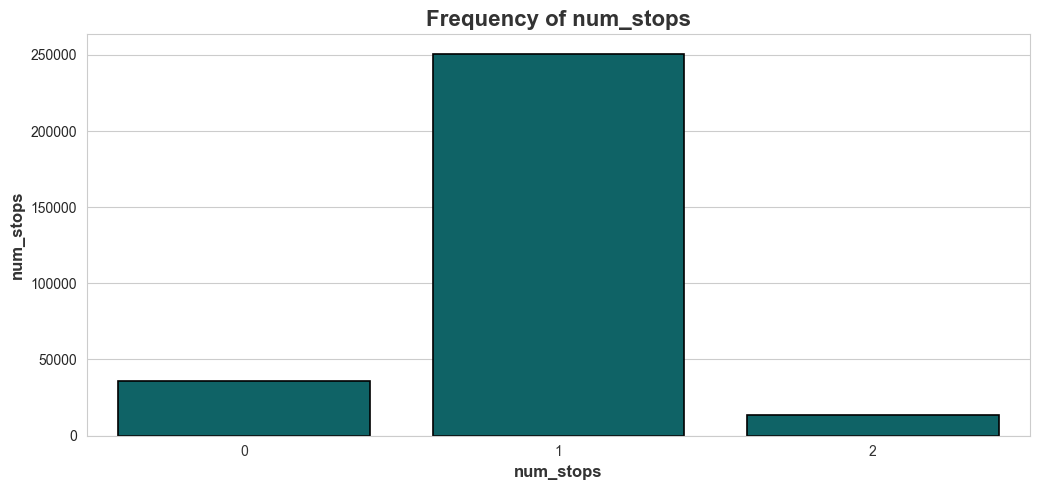

In [33]:
sb.set_style('whitegrid')

plt.figure(figsize=(10.5, 5))
sb.countplot(x='num_stops', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2)

plt.title('Frequency of num_stops', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('num_stops', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('num_stops', fontsize=12, fontweight='bold', color='#333333')

plt.xticks(fontsize=10, color='#333333')

plt.tight_layout()

print(Data_Copy['num_stops'].value_counts())

plt.show()

## **Inferences from `stop_area`**

#### 1. **Non-Stop Flights**
- **Non-stop flights** represent **36,044** entries, which suggests a strong preference for direct routes in the dataset. Non-stop flights are typically more convenient and are often preferred by travelers.

#### 2. **Most Common Stopover Area:**
- **Not defined** appears **256,891** times, indicating that a significant portion of flights either don't specify a stopover or are non-stop flights. This may suggest a high volume of direct flights or missing stopover data for some entries.

#### 3. **Leading Stopover Airports:**
- **Dibrugarh Airport** with **1,861** stopovers and **Indore Airport** with **1,779** stopovers are the most frequent stopover locations. These regional airports play an important role as stopovers in the flight network, likely serving as key transit points for connecting flights.
  
#### 4. **Regional Hubs:**
- Airports such as **Lok Nayak Jayaprakash Airport (Patna)** with **674** stopovers and **Mysore Airport** with **366** stopovers reflect significant regional connections but with lower volumes compared to major airports like Dibrugarh or Indore.
  
#### 5. **International and Major Indian Hubs:**
- **Indira Gandhi International Airport (Delhi)** and **Rajiv Gandhi International Airport (Hyderabad)** are the next most common stopovers, with **153** and **143** stopovers respectively. These airports act as important international and domestic hubs, facilitating a large volume of connecting flights.

#### 6. **Lesser-Known Stopovers:**
- There are several smaller and less frequent stopover airports, such as **Ranchi Airport** (4), **Gaya International Airport** (3), and **Kolhapur Airport** (5). These are likely less common hubs, perhaps catering to specific regional routes or infrequent connections.

stop_area
not defined                                          256891
None                                                  36044
Dibrugarh Airport                                      1861
Indore Airport                                         1779
Lok Nayak Jayaprakash Airport                           674
Mysore Airport                                          366
Patna Airport                                           354
Biju Patnaik International Airport                      301
Kochi Airport                                           284
Jagdalpur Airport                                       193
Surat Airport                                           183
Jorhat Airport                                          175
Mangalore International Airport                         159
Bhubaneswar Airport                                     158
Indira Gandhi International Airport                     153
Rajiv Gandhi International Airport                      143
Birsa Munda Airport           

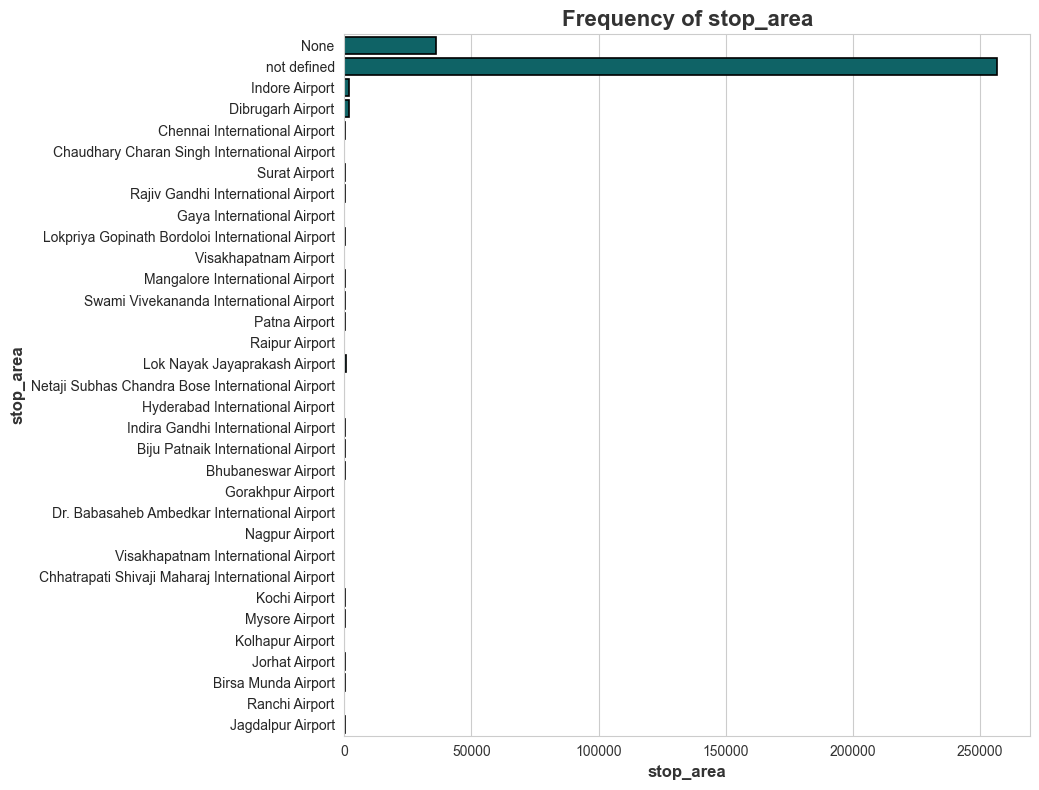

In [34]:
sb.set_style('whitegrid')

plt.figure(figsize=(10.5, 8))
sb.countplot(y='stop_area', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2)

plt.title('Frequency of stop_area', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('stop_area', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('stop_area', fontsize=12, fontweight='bold', color='#333333')

plt.xticks(fontsize=10, color='#333333')

plt.tight_layout()

print(Data_Copy['stop_area'].value_counts())

plt.show()

## **Inferences from `arrival_city`**

#### 1. **Top Arrival Cities**
- **Mumbai** is the most frequent arrival city, with **59,109** flights arriving. This suggests Mumbai is a major hub for air travel in the dataset, likely due to its status as a financial and cultural center in India.
- **Delhi** follows closely with **57,361** arrivals, further reinforcing its role as a key transportation hub, both domestically and internationally.

#### 2. **Other Major Arrival Cities**
- **Bangalore** comes third with **51,112** arrivals, which reflects its importance as a technology and innovation hub, attracting a high volume of flights.
- **Kolkata** with **49,535** arrivals is another significant hub, serving as a major city for business and tourism in Eastern India.
- **Hyderabad** and **Chennai**, with **42,776** and **40,368** arrivals respectively, round out the top cities. These cities are major centers for technology, business, and culture, contributing to their high traffic volumes.

#### 3. **City Distribution**
- The top six cities account for a significant portion of the total flights, with Mumbai, Delhi, and Bangalore leading the way. This suggests that these cities are primary destinations for air travelers in India.

arrival_city
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64


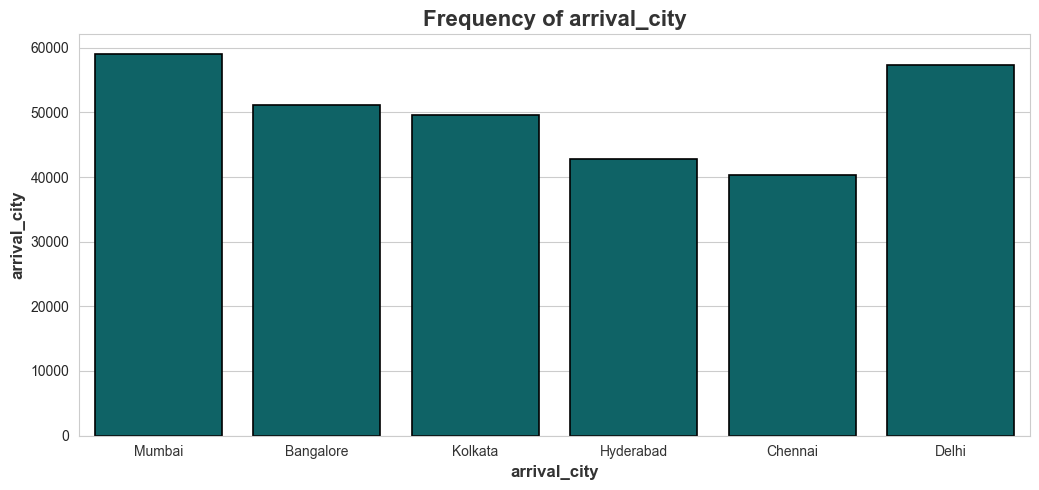

In [35]:
sb.set_style('whitegrid')

plt.figure(figsize=(10.5, 5))
sb.countplot(x='arrival_city', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2)

plt.title('Frequency of arrival_city', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('arrival_city', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('arrival_city', fontsize=12, fontweight='bold', color='#333333')

plt.xticks(fontsize=10, color='#333333')

plt.tight_layout()

print(Data_Copy['arrival_city'].value_counts())

plt.show()

## **Inferences from `flight_type`**

#### 1. **Prevalence of Economy Class**
- **Economy class** accounts for **206,774** flights, which is the overwhelming majority. This suggests that the majority of travelers prefer economy class due to its affordability and wider availability compared to other flight types.

#### 2. **Business Class Demand**
- **Business class** makes up **93,487** flights, significantly fewer than economy class. This reflects a smaller but still substantial segment of the market, indicating that business class is preferred by corporate travelers or individuals seeking additional comfort and services.

In [36]:
flight_type_counts = Data_Copy['flight_type'].value_counts().reset_index()
flight_type_counts

,flight_type,count
0,economy,206774
1,business,93487


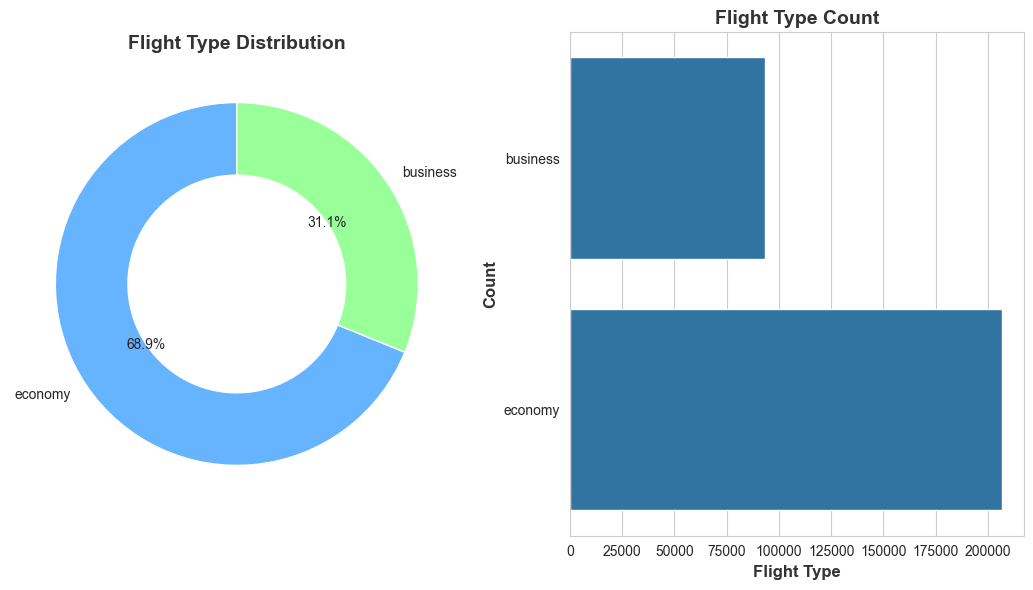

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 6))

ax[0].pie(flight_type_counts['count'], labels=flight_type_counts['flight_type'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'], wedgeprops={'width': 0.4})
ax[0].set_title('Flight Type Distribution', fontsize=14, fontweight='bold', color='#333333')

sb.countplot(Data_Copy['flight_type'], ax = ax[1])
ax[1].set_title('Flight Type Count', fontsize=14, fontweight='bold', color='#333333')
ax[1].set_ylabel('Count', fontsize=12, fontweight='bold', color='#333333')
ax[1].set_xlabel('Flight Type', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()
plt.show()

In [38]:
def process_flight_data(df):
    """
    Processes the flight data to create specific features: 
    'departure_time_of_day', 'arrival_time_of_day', 'is_overnight', 'flight_duration_minutes', 
    'delay_duration_minutes', 'is_late', and 'is_early'. The original columns are removed.

    Args:
    df (pd.DataFrame): The DataFrame containing 'departure_time', 'arrival_time', and 'flight_duration' columns.

    Returns:
    pd.DataFrame: The DataFrame with the desired features and without the original columns.
    """
    
    df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M')
    df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M')

    def time_of_day(hour):
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'
    
    df['departure_time_of_day'] = df['departure_time'].dt.hour.apply(time_of_day)
    df['arrival_time_of_day'] = df['arrival_time'].dt.hour.apply(time_of_day)

    def duration_in_minutes(duration):
        hours, minutes = 0, 0
        try:
            if 'h' in duration:
                hours = int(duration.split('h')[0].strip())
            if 'm' in duration:
                minutes = int(duration.split('h')[1].split('m')[0].strip())
            elif '.' in duration:
                hours, minutes = map(int, duration.split('.'))
        except ValueError:
            hours, minutes = 0, 0
        
        return hours * 60 + minutes

    df['flight_duration_minutes'] = df['flight_duration'].apply(duration_in_minutes)

    df['delay_duration_minutes'] = (df['arrival_time'] - df['departure_time']).dt.total_seconds() / 60
    df['is_late'] = (df['delay_duration_minutes'] > 0).astype(int)

    df['is_overnight'] = (df['arrival_time'] < df['departure_time']).astype(int)

    df['is_early'] = (df['delay_duration_minutes'] < 0).astype(int)

    df.drop(columns=['departure_time', 'arrival_time', 'flight_duration'], inplace=True)
    
    return df

process_flight_data(Data_Copy)

,flight_date,airline_name,airline_code,flight_code,departure_city,arrival_city,ticket_price,flight_type,year,month,day,num_stops,stop_area,departure_time_of_day,arrival_time_of_day,flight_duration_minutes,delay_duration_minutes,is_late,is_overnight,is_early
0,2022-02-11,Air India,AI,868,Delhi,Mumbai,"25,612",business,2022,February,11,0,None,Evening,Evening,120,120.0,1,0,0
1,2022-02-11,Air India,AI,624,Delhi,Mumbai,"25,612",business,2022,February,11,0,None,Evening,Night,135,135.0,1,0,0
2,2022-02-11,Air India,AI,531,Delhi,Mumbai,"42,220",business,2022,February,11,1,not defined,Evening,Evening,1485,45.0,1,0,0
3,2022-02-11,Air India,AI,839,Delhi,Mumbai,"44,450",business,2022,February,11,1,not defined,Night,Night,1590,150.0,1,0,0
4,2022-02-11,Air India,AI,544,Delhi,Mumbai,"46,690",business,2022,February,11,1,not defined,Afternoon,Night,400,400.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,2022-03-31,Vistara,UK,832,Chennai,Hyderabad,"7,697",economy,2022,March,31,1,not defined,Morning,Evening,830,830.0,1,0,0
206770,2022-03-31,Vistara,UK,832,Chennai,Hyderabad,"7,709",economy,2022,March,31,1,not defined,Morning,Evening,830,830.0,1,0,0
206771,2022-03-31,Vistara,UK,826,Chennai,Hyderabad,"8,640",economy,2022,March,31,1,not defined,Afternoon,Morning,1235,-205.0,0,1,1
206772,2022-03-31,Vistara,UK,822,Chennai,Hyderabad,"8,640",economy,2022,March,31,1,not defined,Morning,Morning,1400,-40.0,0,1,1


## **Inferences from `departure_time_of_day` and `arrival_time_of_day`**

#### 1. **Departure Time of Day**
- **Morning (126,603 flights)** is the most common departure time, indicating that a significant number of flights tend to leave early in the day. This could be driven by business and short-haul flights which are common in the morning hours.
- **Afternoon (79,163 flights)** comes second, showing that a notable portion of flights depart after midday, likely for longer journeys or intercity connections.
- **Evening (56,843 flights)** suggests that many flights also depart in the evening, which could be associated with travelers arriving from work or later connections.
- **Night (37,652 flights)** has the least number of departures, though this still represents a substantial portion of flights. Late-night or overnight flights (e.g., for long-haul flights) make up this category.

#### 2. **Arrival Time of Day**
- **Night (82,147 flights)** is the most common arrival time, indicating that a large number of flights arrive late in the evening or early morning. This could be due to long-haul flights, which often have arrival times at night.
- **Morning (76,319 flights)** is another significant arrival period. Early morning arrivals suggest that many flights reach their destinations after long overnight flights or early morning departures.
- **Evening (72,934 flights)** shows that many flights arrive in the evening, likely as a result of afternoon departures, especially for longer flights or flights with stopovers.
- **Afternoon (68,861 flights)** is the least common arrival time, which could reflect fewer flights arriving during this window, as passengers are often either arriving in the morning or evening.

departure_time_of_day
Morning      126603
Afternoon     79163
Evening       56843
Night         37652
Name: count, dtype: int64
arrival_time_of_day
Night        82147
Morning      76319
Evening      72934
Afternoon    68861
Name: count, dtype: int64


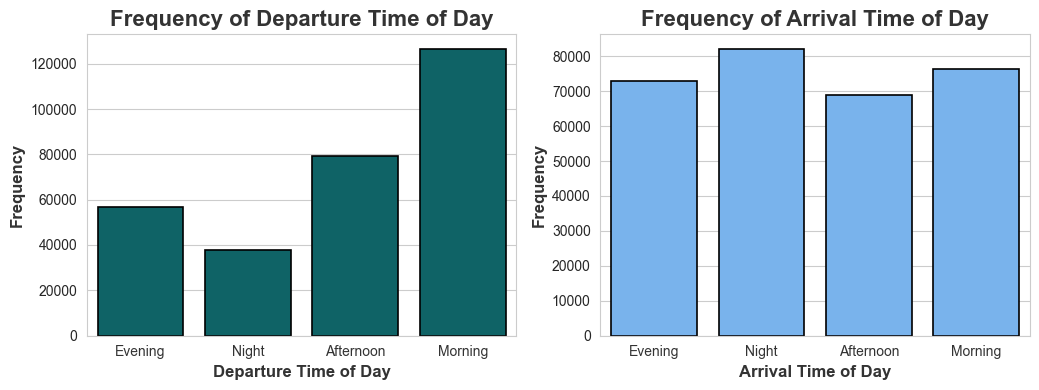

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 4))

sb.countplot(x='departure_time_of_day', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2, ax=ax[0])
ax[0].set_title('Frequency of Departure Time of Day', fontsize=16, fontweight='bold', color='#333333')
ax[0].set_xlabel('Departure Time of Day', fontsize=12, fontweight='bold', color='#333333')
ax[0].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')
ax[0].tick_params(axis='x', labelsize=10, labelcolor='#333333')

sb.countplot(x='arrival_time_of_day', data=Data_Copy, color='#66b3ff', edgecolor='black', linewidth=1.2, ax=ax[1])
ax[1].set_title('Frequency of Arrival Time of Day', fontsize=16, fontweight='bold', color='#333333')
ax[1].set_xlabel('Arrival Time of Day', fontsize=12, fontweight='bold', color='#333333')
ax[1].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')
ax[1].tick_params(axis='x', labelsize=10, labelcolor='#333333')

plt.tight_layout()

print(Data_Copy['departure_time_of_day'].value_counts())
print(Data_Copy['arrival_time_of_day'].value_counts())

plt.show()

## **Inferences from `flight_duration_minutes` and `delay_duration_minutes`**

#### **1. Flight Duration (`flight_duration_minutes`)**
- **Average flight duration**: **733 minutes** (about **12 hours**), indicating many long-haul flights.
- **Wide range**: High **standard deviation** (**431 minutes**) reflects both short and long flights.
- **Outliers**: **Many flights have durations above 2,000 minutes**, suggesting rare or extremely long flights.
- **Minimum of 0 minutes** indicates possible data errors or very short flights (e.g., cancellations).

#### **2. Delay Duration (`delay_duration_minutes`)**
- **Average delay**: **137.79 minutes** (about **2 hours and 18 minutes**), suggesting regular delays.
- **High variability**: **Standard deviation** of **522.41 minutes**, with delays ranging from early arrivals to extreme delays.
- **Negative values**: **Minimum of -1,370 minutes** indicates early arrivals or data errors.
- **Extreme delays**: Maximum delay of **1,230 minutes** (about **20 hours**), suggesting outlier cases of significant delays.

count    300261.000000
mean        733.064617
std         431.577543
min           0.000000
25%         405.000000
50%         675.000000
75%         970.000000
max        2990.000000
Name: flight_duration_minutes, dtype: float64
count    300261.000000
mean        137.789407
std         522.407397
min       -1370.000000
25%        -215.000000
50%         185.000000
75%         535.000000
max        1230.000000
Name: delay_duration_minutes, dtype: float64


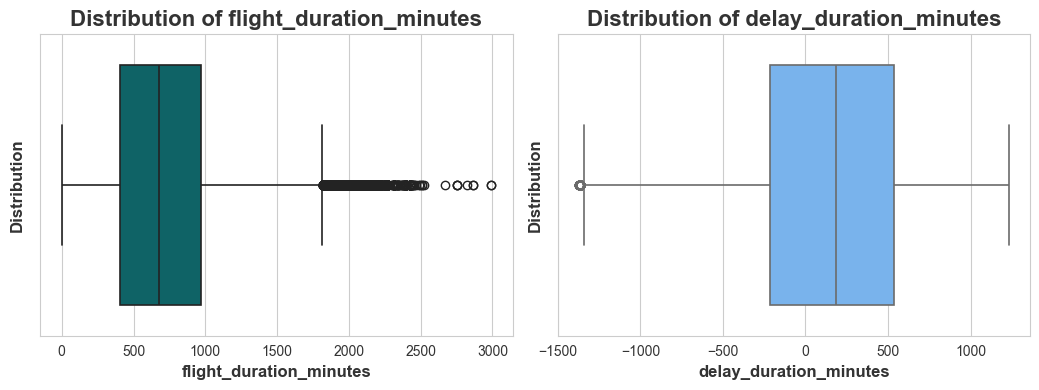

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 4))

sb.boxplot(x='flight_duration_minutes', data=Data_Copy, color='#007074', linewidth=1.2, ax=ax[0])
ax[0].set_title('Distribution of flight_duration_minutes', fontsize=16, fontweight='bold', color='#333333')
ax[0].set_xlabel('flight_duration_minutes', fontsize=12, fontweight='bold', color='#333333')
ax[0].set_ylabel('Distribution', fontsize=12, fontweight='bold', color='#333333')
ax[0].tick_params(axis='x', labelsize=10, labelcolor='#333333')

sb.boxplot(x='delay_duration_minutes', data=Data_Copy, color='#66b3ff', linewidth=1.2, ax=ax[1])
ax[1].set_title('Distribution of delay_duration_minutes', fontsize=16, fontweight='bold', color='#333333')
ax[1].set_xlabel('delay_duration_minutes', fontsize=12, fontweight='bold', color='#333333')
ax[1].set_ylabel('Distribution', fontsize=12, fontweight='bold', color='#333333')
ax[1].tick_params(axis='x', labelsize=10, labelcolor='#333333')

plt.tight_layout()

print(Data_Copy['flight_duration_minutes'].describe())
print(Data_Copy['delay_duration_minutes'].describe())

plt.show()

## **Inferences from `is_late`, `is_overnight`, and `is_early`**

#### **1. `is_late` (Late Flights)**
- **Late flights** (value `1`) account for **203,811** flights, indicating that the majority of flights in the dataset experience delays.
- **On-time flights** (value `0`) make up **96,450** flights, which represents a smaller but still significant portion. This suggests that a considerable number of flights are on time or only experience minor delays.

#### **2. `is_overnight` (Overnight Flights)**
- **Non-overnight flights** (value `0`) account for **204,535** flights, which indicates that most flights in the dataset do not cross over midnight.
- **Overnight flights** (value `1`) make up **95,726** flights, representing a significant portion of the dataset. This suggests that overnight or red-eye flights are common, likely reflecting the need for long-haul flights and time-sensitive travel.

#### **3. `is_early` (Early Flights)**
- **Late or on-time flights** (value `0`) account for **204,535** flights, indicating that a majority of flights are not early.
- **Early flights** (value `1`) represent **95,726** flights, suggesting that early arrivals are not as frequent as late or on-time flights. However, there is still a noticeable portion of flights arriving earlier than scheduled.

is_late
1    203811
0     96450
Name: count, dtype: int64
is_overnight
0    204535
1     95726
Name: count, dtype: int64
is_early
0    204535
1     95726
Name: count, dtype: int64


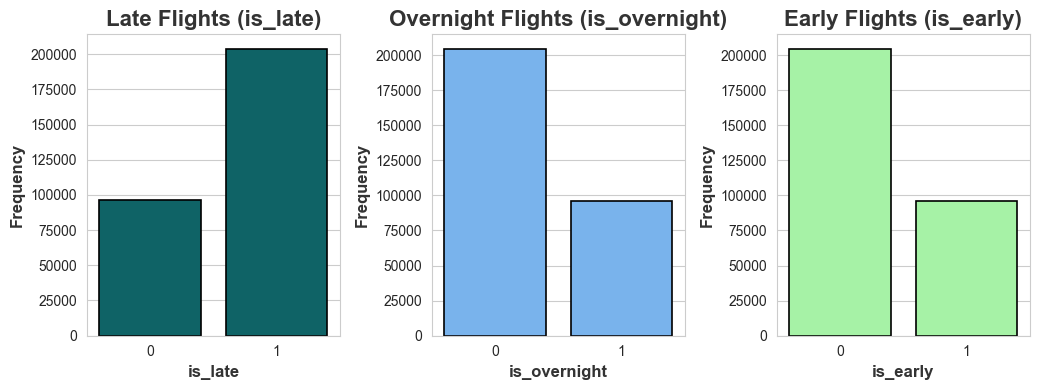

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(10.5, 4))

sb.countplot(x='is_late', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2, ax=ax[0])
ax[0].set_title('Late Flights (is_late)', fontsize=16, fontweight='bold', color='#333333')
ax[0].set_xlabel('is_late', fontsize=12, fontweight='bold', color='#333333')
ax[0].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

sb.countplot(x='is_overnight', data=Data_Copy, color='#66b3ff', edgecolor='black', linewidth=1.2, ax=ax[1])
ax[1].set_title('Overnight Flights (is_overnight)', fontsize=16, fontweight='bold', color='#333333')
ax[1].set_xlabel('is_overnight', fontsize=12, fontweight='bold', color='#333333')
ax[1].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

sb.countplot(x='is_early', data=Data_Copy, color='#99ff99', edgecolor='black', linewidth=1.2, ax=ax[2])
ax[2].set_title('Early Flights (is_early)', fontsize=16, fontweight='bold', color='#333333')
ax[2].set_xlabel('is_early', fontsize=12, fontweight='bold', color='#333333')
ax[2].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

print(Data_Copy['is_late'].value_counts())
print(Data_Copy['is_overnight'].value_counts())
print(Data_Copy['is_early'].value_counts())

plt.show()

In [41]:
def create_flight_code_features_dynamic(df):
    flight_code_counts = df['flight_code'].value_counts()

    threshold_frequent = flight_code_counts.quantile(0.75)
    threshold_high = flight_code_counts.quantile(0.75)
    threshold_medium = flight_code_counts.quantile(0.25)
    
    df['is_frequent_route'] = df['flight_code'].map(flight_code_counts) > threshold_frequent
    
    def categorize_by_dynamic_frequency(count):
        if count >= threshold_high:
            return 'High'
        elif count >= threshold_medium:
            return 'Medium'
        else:
            return 'Low'

    df['flight_code_category'] = df['flight_code'].map(flight_code_counts).apply(categorize_by_dynamic_frequency)
    
    df['is_rare_flight'] = df['flight_code'].map(flight_code_counts).apply(lambda x: 1 if x == 1 else 0)

    df.drop(columns=['flight_code'], inplace=True)

    return df

create_flight_code_features_dynamic(Data_Copy)

,flight_date,airline_name,airline_code,departure_city,arrival_city,ticket_price,flight_type,year,month,day,...,departure_time_of_day,arrival_time_of_day,flight_duration_minutes,delay_duration_minutes,is_late,is_overnight,is_early,is_frequent_route,flight_code_category,is_rare_flight
0,2022-02-11,Air India,AI,Delhi,Mumbai,"25,612",business,2022,February,11,...,Evening,Evening,120,120.0,1,0,0,True,High,0
1,2022-02-11,Air India,AI,Delhi,Mumbai,"25,612",business,2022,February,11,...,Evening,Night,135,135.0,1,0,0,True,High,0
2,2022-02-11,Air India,AI,Delhi,Mumbai,"42,220",business,2022,February,11,...,Evening,Evening,1485,45.0,1,0,0,True,High,0
3,2022-02-11,Air India,AI,Delhi,Mumbai,"44,450",business,2022,February,11,...,Night,Night,1590,150.0,1,0,0,True,High,0
4,2022-02-11,Air India,AI,Delhi,Mumbai,"46,690",business,2022,February,11,...,Afternoon,Night,400,400.0,1,0,0,True,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,2022-03-31,Vistara,UK,Chennai,Hyderabad,"7,697",economy,2022,March,31,...,Morning,Evening,830,830.0,1,0,0,True,High,0
206770,2022-03-31,Vistara,UK,Chennai,Hyderabad,"7,709",economy,2022,March,31,...,Morning,Evening,830,830.0,1,0,0,True,High,0
206771,2022-03-31,Vistara,UK,Chennai,Hyderabad,"8,640",economy,2022,March,31,...,Afternoon,Morning,1235,-205.0,0,1,1,True,High,0
206772,2022-03-31,Vistara,UK,Chennai,Hyderabad,"8,640",economy,2022,March,31,...,Morning,Morning,1400,-40.0,0,1,1,True,High,0


## **Inferences from `is_frequent_route`, `flight_code_category`, and `is_rare_flight`**

#### **1. `is_frequent_route` (Frequent Routes)**
- **Frequent routes (True)** account for **244,460** flights, indicating that the majority of flights in the dataset are considered frequent, based on the dynamic threshold. These are routes that are regularly operated and likely carry high passenger volumes.
- **Non-frequent routes (False)** represent **55,801** flights, meaning there are a significant number of less frequently operated routes. These may include seasonal flights, special operations, or less popular routes.

#### **2. `flight_code_category` (Flight Code Category by Frequency)**
- **High-frequency codes (High)** account for **244,460** flights, suggesting that a majority of the flight codes in the dataset belong to routes that are frequently operated. These are the primary routes that airlines run on a regular basis.
- **Medium-frequency codes (Medium)** represent **52,971** flights, indicating that there are several moderately frequent routes. These could be less popular than high-frequency routes but still operate regularly.
- **Low-frequency codes (Low)** represent **2,830** flights, suggesting a relatively small number of flights belong to routes with low frequency. These could be routes that are less popular or are operated less frequently, possibly on special days or at certain times of the year.

#### **3. `is_rare_flight` (Rare Flights)**
- **Non-rare flights (0)** account for **300,244** flights, indicating that the vast majority of flight codes in the dataset are not considered rare. These represent regular operations on commonly operated routes.
- **Rare flights (1)** represent **17** flights, suggesting that there are very few rare or one-off flights in the dataset. These could correspond to special or charter flights, very niche routes, or errors in data recording.

is_frequent_route
True     244460
False     55801
Name: count, dtype: int64
flight_code_category
High      244460
Medium     52971
Low         2830
Name: count, dtype: int64
is_rare_flight
0    300244
1        17
Name: count, dtype: int64


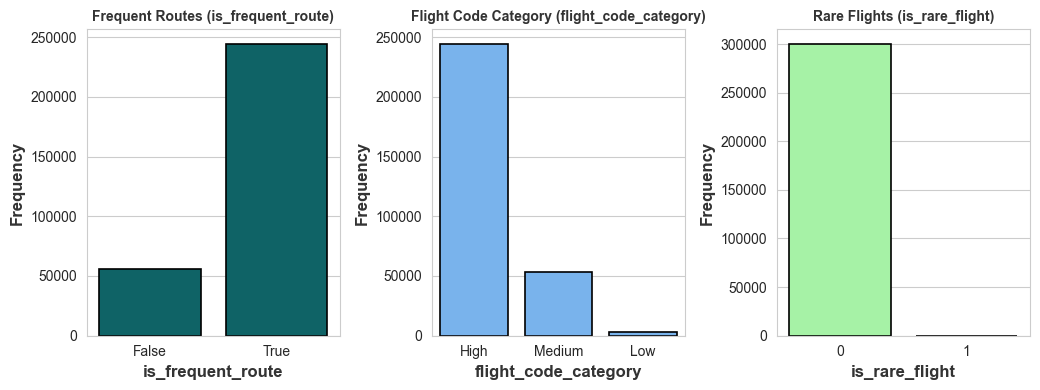

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(10.5, 4))

sb.countplot(x='is_frequent_route', data=Data_Copy, color='#007074', edgecolor='black', linewidth=1.2, ax=ax[0])
ax[0].set_title('Frequent Routes (is_frequent_route)', fontsize=10, fontweight='bold', color='#333333')
ax[0].set_xlabel('is_frequent_route', fontsize=12, fontweight='bold', color='#333333')
ax[0].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

sb.countplot(x='flight_code_category', data=Data_Copy, color='#66b3ff', edgecolor='black', linewidth=1.2, ax=ax[1])
ax[1].set_title('Flight Code Category (flight_code_category)', fontsize=10, fontweight='bold', color='#333333')
ax[1].set_xlabel('flight_code_category', fontsize=12, fontweight='bold', color='#333333')
ax[1].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

sb.countplot(x='is_rare_flight', data=Data_Copy, color='#99ff99', edgecolor='black', linewidth=1.2, ax=ax[2])
ax[2].set_title('Rare Flights (is_rare_flight)', fontsize=10, fontweight='bold', color='#333333')
ax[2].set_xlabel('is_rare_flight', fontsize=12, fontweight='bold', color='#333333')
ax[2].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

print(Data_Copy['is_frequent_route'].value_counts())
print(Data_Copy['flight_code_category'].value_counts())
print(Data_Copy['is_rare_flight'].value_counts())

plt.show()

In [43]:
Data_Copy['ticket_price'] = Data_Copy['ticket_price'].replace({r'[^\d.]': ''}, regex=True).astype(int)

## **Inferences from `ticket_price`**

#### **1. Descriptive Statistics**
- **Count**: There are **300,261** entries in the `ticket_price` column, indicating a large dataset with a wide range of ticket prices.
- **Mean**: The average ticket price is **20,883.72**, suggesting that most ticket prices are in the lower range but there are higher-priced tickets that increase the average.
- **Standard Deviation**: The **high standard deviation** of **22,695.91** reflects a large spread in ticket prices, meaning there are significant variations in the prices, likely due to premium flights or long-haul tickets.
- **Minimum Price**: The lowest ticket price is **1,105**, indicating a budget-friendly or low-cost flight option.
- **25th Percentile (Q1)**: **4,783** is the price below which 25% of the tickets fall, showing that a quarter of tickets are priced below this value.
- **50th Percentile (Median)**: The median price is **7,425**, meaning that half of the tickets are priced below this amount, and half are above it.
- **75th Percentile (Q3)**: The 75th percentile is **42,521**, indicating that 75% of tickets are priced below this value, and a quarter of tickets have higher prices.
- **Maximum Price**: The maximum price is **123,071**, which is quite high and indicates that there are **premium, long-haul, or luxury flights** at the top end of the price range.

#### **2. Outliers Above 100,000**
- The **outliers above 100,000** suggest the presence of exceptionally high-ticket prices, likely reflecting:
  - **First-class, business class**, or **premium tickets**.
  - **Long-haul flights** or flights to remote destinations.
  - **Charter flights** or exclusive offerings with limited availability.

count    300261.000000
mean      20883.717666
std       22695.911266
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: ticket_price, dtype: float64


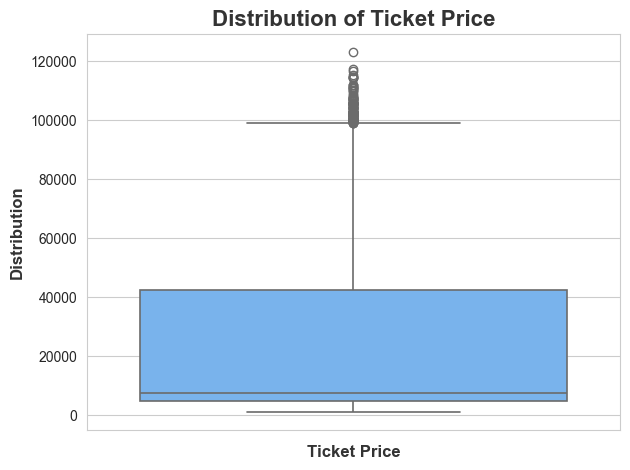

In [44]:
sb.boxplot(y = 'ticket_price', data=Data_Copy, color='#66b3ff', linewidth=1.2)

plt.title('Distribution of Ticket Price', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Distribution', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

print(Data_Copy['ticket_price'].describe())

plt.show()

### Removing Irrelavant Features

In this process, several columns are dropped from the dataset based on the rationale provided for each:

1. **`flight_date`**:  
   - The **flight_date** column is dropped because the specific date of the flight is **not required for modeling purposes**. In many cases, the model might only require high-level temporal features such as **year, month**, or **day**, which are already extracted or irrelevant for prediction.

2. **`airline_code`**:  
   - The **airline_code** column is dropped because it provides the **same information as the `airline_name`** column. The `airline_name` gives the full name of the airline, making the `airline_code` redundant for analysis or modeling.

3. **`year`, `month`, `day`**:  
   - These columns, which provide the **exact date-related details**, are dropped because this detailed information is **not required for modeling**. The only useful temporal feature might be derived from the **month** or **day of the week**, which may already be included in other derived features. Additionally, extracting these from a single timestamp might serve the same purpose without cluttering the model.

4. **`stop_area`**:  
   - The **stop_area** column is dropped because **85.56% of its values are "not defined"**. This high percentage of missing or undefined data makes it a poor candidate for modeling, as it would not provide meaningful or actionable insights. Retaining it could potentially add noise or complexity without improving the model's performance.

In [25]:
Data_Copy.drop(['flight_date', 'airline_code', 'year', 'month', 'day', 'stop_area'], axis = 1, inplace=True)

In [45]:
Data_Copy['is_frequent_route'] = Data_Copy['is_frequent_route'].map({
    True : 0,
    False : 1
})

## **Ticket Price vs Delay Duration**

### 1. **Delay Duration vs Ticket Price:**
   - The x-axis seems to represent **delay duration**, and the y-axis represents **ticket prices**.
   - There is no apparent correlation between **ticket price** and **delay duration**. This suggests that even if a flight is delayed, its price does not seem to consistently increase or decrease.
   
### 2. **Spread of Data:**
   - There is a wide range of **ticket prices** across all **delay durations**, indicating that both delayed and on-time flights can have similar ticket prices.
   - The majority of data points cluster at lower ticket prices (below 30,000), with some outliers that have higher ticket prices.

### 3. **Outliers:**
   - There are some **outliers** with **very high ticket prices**, possibly for premium services or long-duration flights, but they do not seem to correlate with **delay duration**.

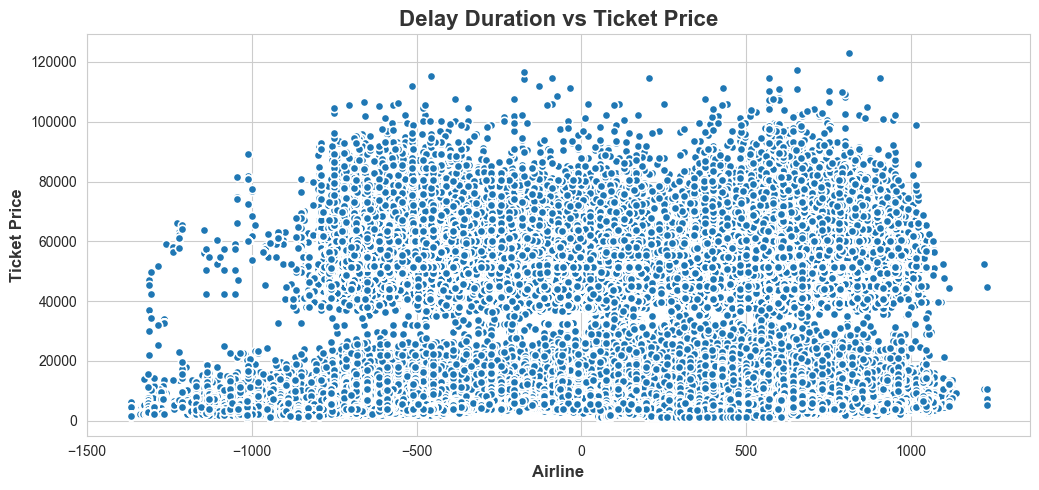

In [46]:
plt.figure(figsize=(10.5, 5))

sb.scatterplot(x = 'delay_duration_minutes',y = 'ticket_price', data=Data_Copy, linewidth=1.2)

plt.title('Delay Duration vs Ticket Price', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Flight Duration**

### 1. **Ticket Price vs Flight Duration:**
   - The plot shows a wide distribution of **ticket prices** against **flight durations**.
   - **Shorter flights** (with lower flight duration) generally seem to have **lower ticket prices**.
   - **Longer flights** (with higher flight durations) seem to have **a wider range of ticket prices**, but many of the data points are clustered at lower ticket prices, indicating that there are a lot of affordable long-duration flights.

### 2. **Outliers:**
   - There are some **outliers** where **very high ticket prices** (over 50,000) are associated with **longer flight durations**. This suggests that certain long flights (likely international flights or flights with premium services) are significantly more expensive than others.
   - The plot shows **lower ticket prices** clustering near the bottom, suggesting that there are many budget options available for both short and long flights.

### 3. **No Clear Linear Relationship:**
   - There doesn’t appear to be a clear linear correlation between **flight duration** and **ticket price**. While some longer flights are more expensive, the variation in ticket prices is high for both short and long flights. This could mean other factors (like airline, class, and demand) also play significant roles in determining ticket price.

### 4. **Flight Duration and Price Distribution:**
   - Most data points are clustered in the lower end of the price spectrum, indicating that most of the flights (whether long or short) are relatively affordable.
   - However, the plot shows a **tail** towards higher ticket prices, which indicates a smaller number of flights (long duration or rare flights) that are much more expensive.

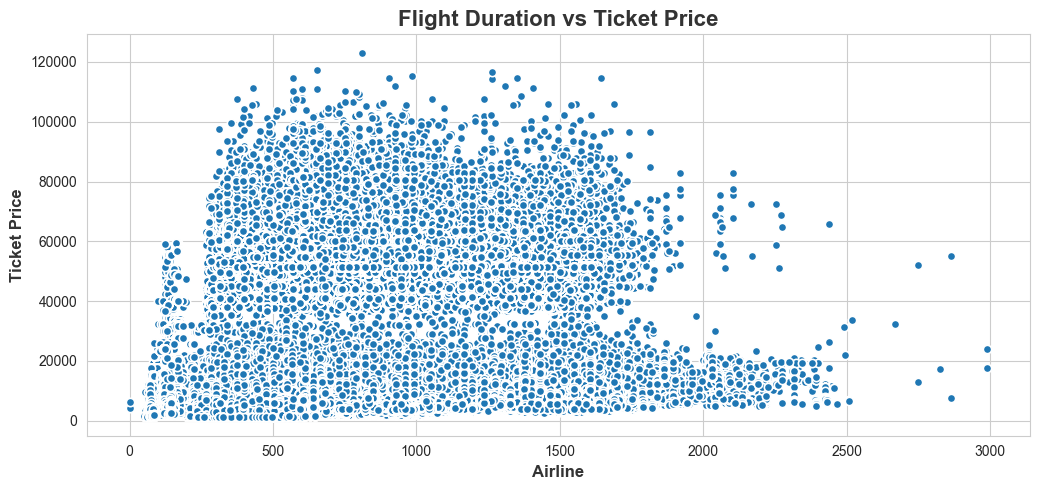

In [47]:
plt.figure(figsize=(10.5, 5))

sb.scatterplot(x = 'flight_duration_minutes',y = 'ticket_price', data=Data_Copy, linewidth=1.2)

plt.title('Flight Duration vs Ticket Price', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Airline vs Rare Flight**

### 1. **Ticket Prices for Rare Flights**
   - **Air India** and **Vistara** show a significant increase in ticket prices for **rare flights** (shown by the orange bars). The prices for rare flights are much higher compared to regular flights (blue bars).
   - **SpiceJet**, **AirAsia**, and **GO FIRST** show much smaller differences in ticket prices between **rare flights** and regular flights.
   - **Indigo**, **Trujet**, and **StarAir** have relatively low ticket prices across both **regular** and **rare flights**, with only a slight increase for **rare flights**.

### 2. **Impact of Flight Rarity on Price**
   - **Rare flights** typically lead to a higher price for premium airlines like **Air India** and **Vistara**, suggesting that these flights might be limited or special, thus driving up the cost.
   - For most budget airlines, the price difference between **regular** and **rare flights** is much less, indicating that these airlines maintain more consistent pricing regardless of flight rarity.

### 3. **Budget Airlines Pricing**
   - **Indigo**, **Trujet**, and **StarAir** continue to offer the lowest ticket prices, with a minimal price increase for **rare flights**.
   - **SpiceJet** and **AirAsia** also have low ticket prices, and the difference between regular and rare flights is not as significant as with premium airlines.

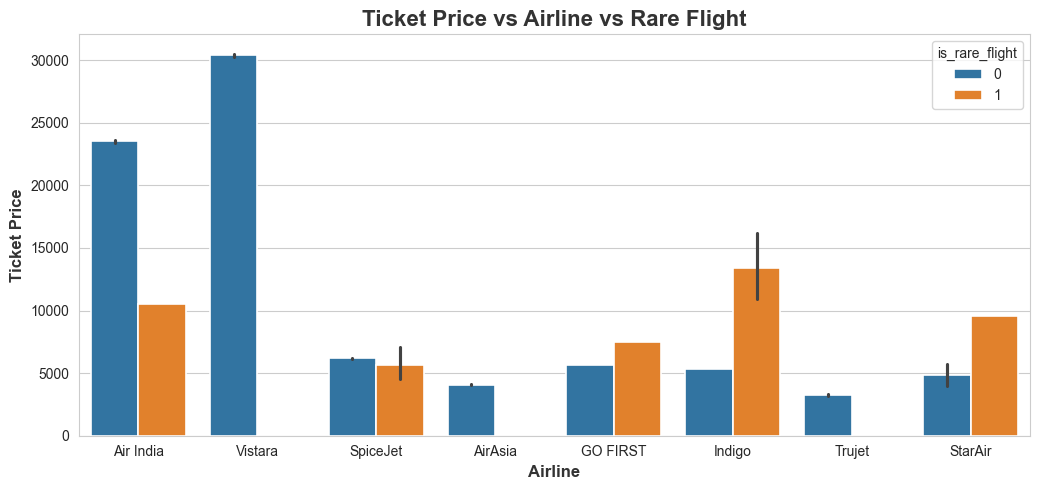

In [48]:
plt.figure(figsize=(10.5, 5))

sb.barplot(x = 'airline_name',y = 'ticket_price', data=Data_Copy, hue = 'is_rare_flight', linewidth=1.2)

plt.title('Ticket Price vs Airline vs Rare Flight', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Airline vs Flight Code**

### 1. **Ticket Prices by Airline and Flight Code Category**
   - **Vistara** and **Air India** have significantly higher ticket prices for flights with **High** flight codes (likely referring to premium services), with **Vistara** having the highest ticket prices across all categories.
   - **SpiceJet**, **AirAsia**, and **GO FIRST** maintain lower ticket prices across all flight code categories, but still have a noticeable difference in pricing between **High**, **Medium**, and **Low** flight codes.
   - **Indigo**, **Trujet**, and **StarAir** have the lowest prices across the board, with a notable difference in pricing for **Low** flight codes.

### 2. **Impact of Flight Code on Ticket Prices**
   - The **High** flight code category typically corresponds to higher ticket prices, especially for **Vistara** and **Air India**, which are premium airlines.
   - The **Medium** and **Low** flight code categories show a more consistent reduction in prices, with the lowest prices in the **Low** category for budget airlines like **SpiceJet**, **Indigo**, **Trujet**, and **StarAir**.

### 3. **Budget Airlines**
   - **StarAir** stands out as the most affordable airline, particularly for **Low** flight code tickets.
   - **Indigo** and **Trujet** also offer low ticket prices, especially for **Low** flight code categories.

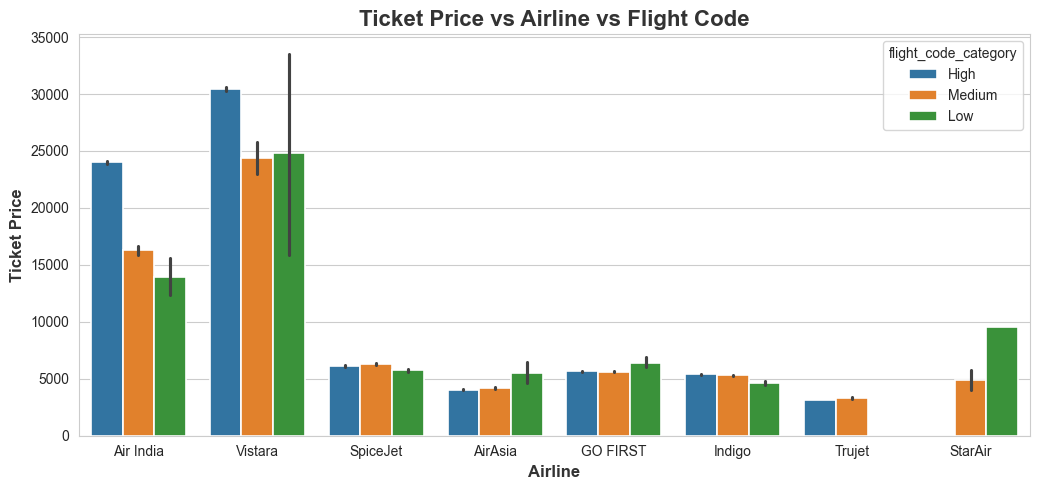

In [49]:
plt.figure(figsize=(10.5, 5))

sb.barplot(x = 'airline_name',y = 'ticket_price', data=Data_Copy, hue = 'flight_code_category', linewidth=1.2)

plt.title('Ticket Price vs Airline vs Flight Code', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Airline vs Number of Stops**

### 1. **Ticket Prices by Airline and Number of Stops**
   - **Vistara** and **Air India** have significantly higher ticket prices, particularly for flights with **0 stops** (direct flights). 
   - The prices for **Vistara** are particularly high, especially for flights with **0 stops**, indicating that they offer premium services.
   
### 2. **Impact of Stops on Ticket Prices**
   - For most airlines, the ticket prices for **1 stop** flights are generally higher than for **2 stop** flights, suggesting that passengers may be paying more for a flight with fewer stops.
   - **Vistara** continues to have high prices for both **1 stop** and **0 stop** flights, while **Air India** shows a more noticeable drop in price with **1 stop** flights.
   
### 3. **Budget Airlines with Low Prices**
   - Airlines like **SpiceJet**, **AirAsia**, and **GO FIRST** maintain low prices regardless of the number of stops.
   - These airlines show a small variation in ticket prices depending on the number of stops, with prices being affordable even for **1 stop** or **2 stop** flights.

### 4. **Cheapest Airlines**
   - **StarAir** and **Trujet** are the most affordable airlines, with ticket prices consistently low across all categories (0, 1, and 2 stops). They also show some variation based on the number of stops, but their prices remain low.

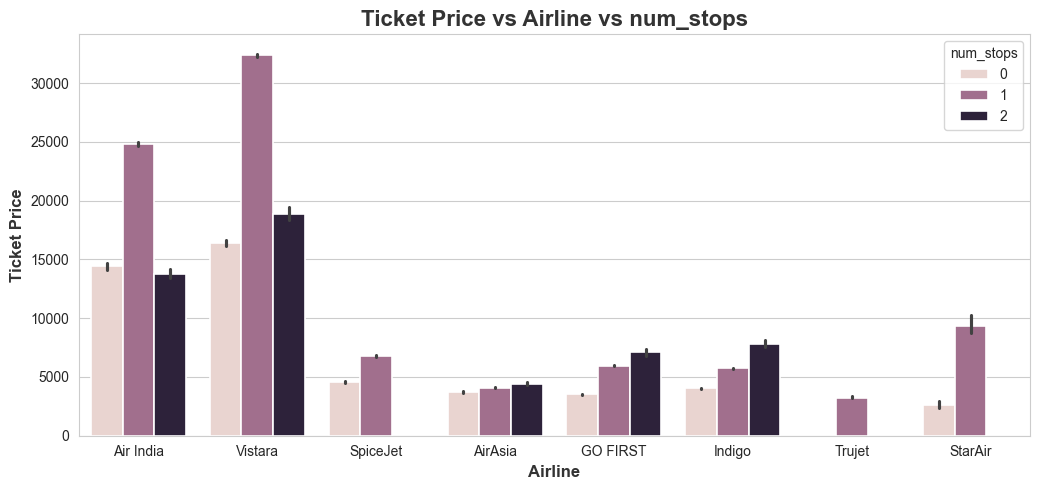

In [31]:
plt.figure(figsize=(10.5, 5))

sb.barplot(x = 'airline_name',y = 'ticket_price', data=Data_Copy, hue = 'num_stops', linewidth=1.2)

plt.title('Ticket Price vs Airline vs num_stops', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Airline vs Arrival City**

### 1. **Ticket Prices Across Different Airlines**
   - Similar to the previous chart, **Air India** and **Vistara** are the most expensive airlines, with significantly higher ticket prices compared to others.
   - **SpiceJet**, **AirAsia**, and **GO FIRST** continue to have much lower ticket prices.

### 2. **Variation in Ticket Prices by Arrival City**
   - **Vistara** and **Air India** show noticeable ticket price variation depending on the arrival city. For example, flights arriving in **Mumbai** or **Bangalore** are slightly more expensive than those arriving in **Chennai** or **Delhi**.
   - **SpiceJet** and **AirAsia** show smaller price variations across arrival cities, maintaining relatively stable fares.

### 3. **Budget Airlines with Consistent Pricing**
   - Airlines like **Indigo**, **Trujet**, and **StarAir** consistently show lower ticket prices across various cities, with small fluctuations.
   - **StarAir** has the lowest prices among all airlines, especially when arriving in cities like **Chennai**.

### 4. **Cities with Higher Ticket Prices**
   - **Mumbai** and **Bangalore** appear to have higher ticket prices, particularly for premium airlines like **Air India** and **Vistara**.
   - **Kolkata**, **Hyderabad**, and **Chennai** show comparatively lower ticket prices for both premium and budget airlines.

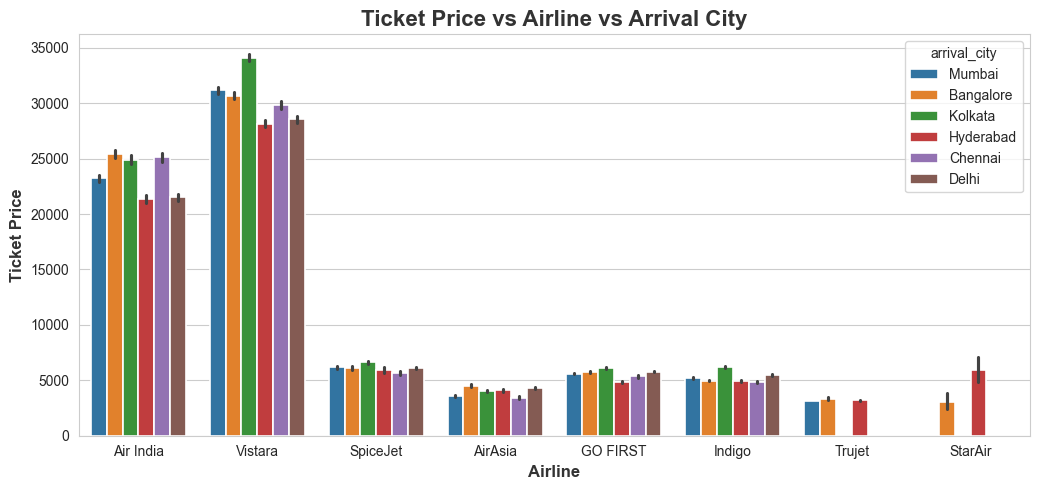

In [32]:
plt.figure(figsize=(10.5, 5))

sb.barplot(x = 'airline_name',y = 'ticket_price', data=Data_Copy, hue = 'arrival_city', linewidth=1.2)

plt.title('Ticket Price vs Airline vs Arrival City', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Airline vs Departure City**

### 1. **Ticket Prices Across Different Airlines**
   - Airlines like **Air India** and **Vistara** consistently have higher ticket prices across all departure cities, especially for flights departing from cities like **Delhi** and **Mumbai**.
   - **SpiceJet** and **AirAsia** have relatively lower ticket prices, with their fares being more uniform across different departure cities.

### 2. **Variation in Ticket Prices by Departure City**
   - **Vistara** and **Air India** have slightly varying ticket prices depending on the departure city, but these variations are relatively consistent.
   - **SpiceJet** shows small differences in ticket prices based on the departure city, but the price range is still quite affordable compared to the premium airlines.
   - **Indigo**, **Trujet**, and **StarAir** have noticeably lower ticket prices, but their price variation across cities is also quite minimal.

### 3. **Cities with Higher Ticket Prices**
   - **Delhi** and **Mumbai** appear to have some of the higher ticket prices, especially for airlines like **Air India** and **Vistara**.
   - Cities like **Kolkata**, **Hyderabad**, and **Chennai** have lower ticket prices overall for the budget airlines.

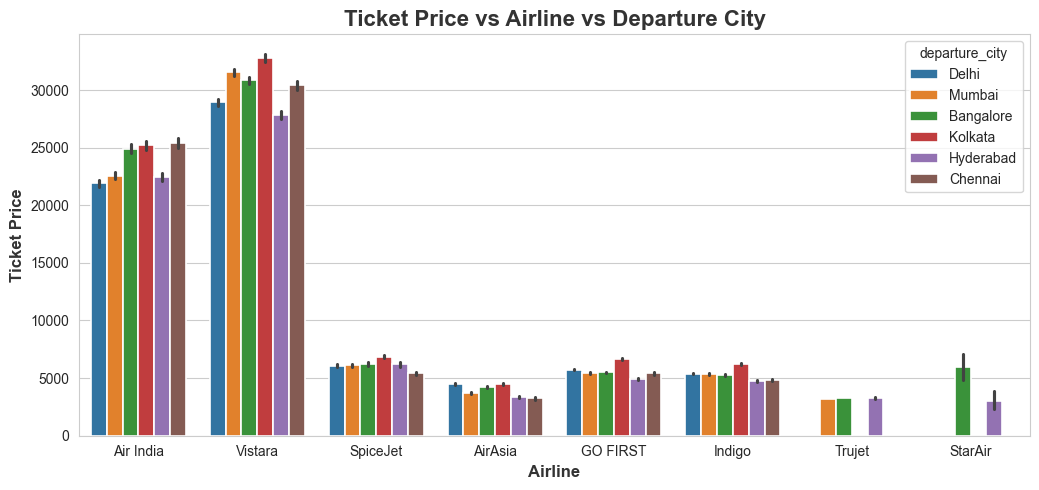

In [33]:
plt.figure(figsize=(10.5, 5))

sb.barplot(x = 'airline_name',y = 'ticket_price', data=Data_Copy, hue = 'departure_city', linewidth=1.2)

plt.title('Ticket Price vs Airline vs Departure City', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Ticket Price vs Airline vs Flight Class**

### 1. **Ticket Prices by Airline**
   The chart compares ticket prices between different airlines, with a distinction made between business and economy class flights.

### 2. **High Prices for Business Class**
   - Airlines such as **Air India** and **Vistara** have significantly higher ticket prices for business class.
   - **Vistara** stands out with the highest ticket price among the airlines for business class.

### 3. **Economy Class Prices**
   - The prices for economy class are much lower than business class, and there is a noticeable drop in price for most airlines.
   - **SpiceJet**, **AirAsia**, **GO FIRST**, **Indigo**, **Trujet**, and **StarAir** all feature relatively low ticket prices for economy class.

### 4. **Limited Variation in Economy Class**
   - The price difference for economy class tickets between airlines is relatively small, indicating that most airlines offer similar pricing for economy seats.

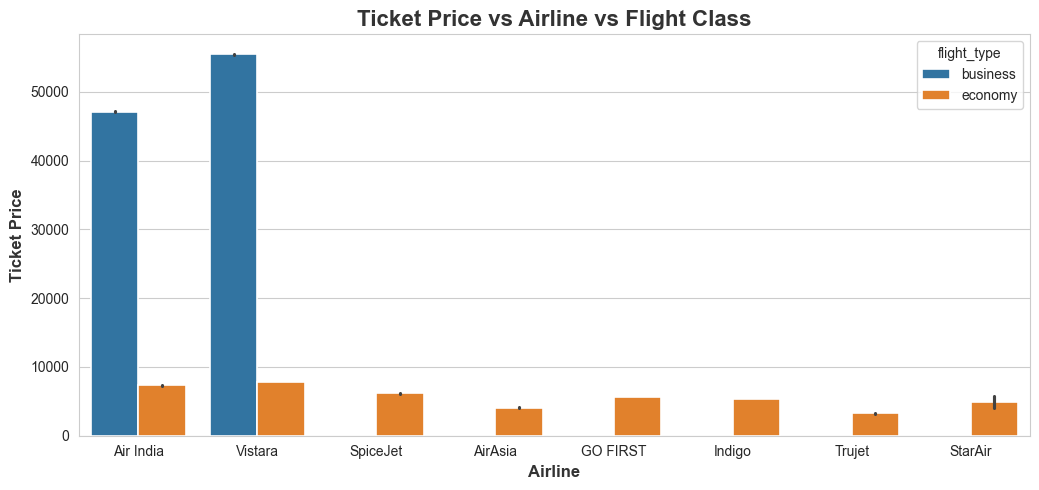

In [543]:
plt.figure(figsize=(10.5, 5))

sb.barplot(x = 'airline_name',y = 'ticket_price', data=Data_Copy, hue = 'flight_type', linewidth=1.2)

plt.title('Ticket Price vs Airline vs Flight Class', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Airline', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Ticket Price', fontsize=12, fontweight='bold', color='#333333')

plt.tight_layout()

plt.show()

## **Feature Importance**

### 1. **Most Important Feature:**
   - **`flight_type`** has the highest importance score (**0.883**), meaning that this feature plays a **dominant role** in predicting the target variable. The flight class (business vs. economy) likely has the biggest impact on ticket price or other outcomes.
   
### 2. **Moderately Important Features:**
   - **`flight_duration_minutes`** has a moderate importance (**0.049**), suggesting that the **duration of the flight** is a relevant factor, but not as crucial as flight type.
   - **`airline_name`** has a relatively lower importance score (**0.025**), indicating that the airline itself contributes less to predicting the target compared to flight type or flight duration.

### 3. **Less Important Features:**
   - Features like **`delay_duration_minutes`** (**0.012**), **`departure_city`** (**0.009**), and **`arrival_city`** (**0.009**) are less important, meaning that while they might have some influence, they do not significantly affect the outcome in this model.
   
### 4. **Very Low Impact Features:**
   - Features such as **`num_stops`** (**0.004**), **`arrival_time_of_day`** (**0.003**), **`departure_time_of_day`** (**0.003**), and others like **`flight_code_category`**, **`is_frequent_route`**, **`is_late`**, **`is_overnight`**, **`is_early`**, and **`is_rare_flight`** have a **minimal impact** on the prediction. These features have scores close to **0**, indicating that they contribute very little to the model’s accuracy or decision-making process.

In [61]:
grouped_duration = Data_Copy.groupby(
    ['departure_city', 'arrival_city', 'num_stops']
)['flight_duration_minutes'].mean().reset_index()

grouped_duration.rename(columns={'flight_duration_minutes': 'avg_flight_duration_minutes'}, inplace=True)

grouped_duration = grouped_duration.sort_values(by='avg_flight_duration_minutes')

grouped_duration.to_csv("./duration_summary.csv", index = False)

In [452]:
df = New_Copy.copy()

feature_importance_columns = ['airline_name', 'departure_city', 'arrival_city', 'flight_type', 'departure_time_of_day',
                              'arrival_time_of_day', 'flight_code_category', 'is_frequent_route']

for col in feature_importance_columns:
    oe = OrdinalEncoder()
    df[col] = oe.fit_transform(df[[col]])
    print(oe.categories_)

X_label = df.drop('ticket_price', axis=1).fillna(0)
y_label = df['ticket_price']

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)
fi_rf = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
})

[array(['Air India', 'AirAsia', 'GO FIRST', 'Indigo', 'SpiceJet',
       'StarAir', 'Trujet', 'Vistara'], dtype=object)]
[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)]
[array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)]
[array(['business', 'economy'], dtype=object)]
[array(['Afternoon', 'Evening', 'Morning', 'Night'], dtype=object)]
[array(['Afternoon', 'Evening', 'Morning', 'Night'], dtype=object)]
[array(['High', 'Low', 'Medium'], dtype=object)]
[array([False,  True])]


In [577]:
New_Copy = Data_Copy.copy()

In [571]:
fi_rf.sort_values(by='rf_importance', ascending=False)

,feature,rf_importance
3,flight_type,0.883
7,flight_duration_minutes,0.049
0,airline_name,0.025
8,delay_duration_minutes,0.012
1,departure_city,0.009
2,arrival_city,0.009
4,num_stops,0.004
6,arrival_time_of_day,0.003
5,departure_time_of_day,0.003
13,flight_code_category,0.001


In [579]:
fi_rf[fi_rf['rf_importance'] >= 0.001]['feature'].to_list()

['airline_name',
 'departure_city',
 'arrival_city',
 'flight_type',
 'num_stops',
 'departure_time_of_day',
 'arrival_time_of_day',
 'flight_duration_minutes',
 'delay_duration_minutes',
 'flight_code_category']

In [627]:
final_df = New_Copy[['airline_name',
 'departure_city',
 'arrival_city',
 'flight_type',
 'num_stops',
 'departure_time_of_day',
 'arrival_time_of_day',
 'flight_duration_minutes',
 'delay_duration_minutes',
 'flight_code_category', 'ticket_price']
]

## **Skewness**
During the analysis of the data, we observed that certain numerical features exhibit skewness. Here are the skewness values for some of the key numerical features in the dataset:

```plaintext
flight_duration_minutes    0.603
delay_duration_minutes    -0.572
ticket_price               1.062
```

- **flight_duration_minutes**: This feature has a positive skewness of 0.603, indicating that it is right-skewed (i.e., the tail is stretched to the right).
- **delay_duration_minutes**: This feature has a negative skewness of -0.572, indicating that it is left-skewed (i.e., the tail is stretched to the left).
- **ticket_price**: This feature has a positive skewness of 1.062, suggesting that it is strongly right-skewed.

### **Approach to Handle Skewness**

Initially, I attempted to remove the skewness from the dataset using transformations such as logarithmic or square root transformations. However, after transforming the data to reduce skewness, I noticed a **reduction in model accuracy**. This result led me to reconsider removing the skewness.

### **Why Skewness Wasn't Removed**

After experimenting with transformations, I found that scaling the numeric features and removing the skewness negatively impacted the model's performance. This might be due to the nature of the data, where the skewed distribution contains valuable information for the model. In some cases, especially with certain models (such as tree-based models like Random Forest), the raw skewed features tend to work better as they can handle non-linearities and complex relationships more effectively.

In [641]:
final_df[[ 'flight_duration_minutes',
 'delay_duration_minutes', 'ticket_price']].skew()

flight_duration_minutes    0.603
delay_duration_minutes    -0.572
ticket_price               1.062
dtype: float64

## **Data Preprocessing**

We first define the columns for encoding categorical features and apply preprocessing steps using `ColumnTransformer`:

- **One-Hot Encoding**: Categorical features such as `airline_name`, `departure_city`, and others are encoded using `OneHotEncoder`.
- **Ordinal Encoding**: The feature `flight_code_category` is encoded using `OrdinalEncoder`.


### **Model Selection and GridSearchCV**

The goal is to find the best model and hyperparameters using `GridSearchCV`. In this case, we are testing different regression models.

### **GridSearchCV Setup**

We set up a `GridSearchCV` to explore different combinations of models and hyperparameters. The grid search is conducted with 5-fold cross-validation, and `n_jobs=-1` ensures that all available CPU cores are utilized.

### **Model Training and Evaluation**

We split the data into training and testing sets, and then use `GridSearchCV` to train the models on the training data. After fitting, we retrieve the best-performing model and its hyperparameters.

In [630]:
onehot_cols = ['airline_name', 'departure_city', 'flight_type', 'arrival_city', 'arrival_time_of_day', 'departure_time_of_day']
ordinal_cols = ['flight_code_category']

def sqrt_with_nonneg(x):
    return np.sqrt(np.maximum(x, 0))

ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
    ], remainder='passthrough')

models = {
    # 'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    # 'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(),
    # 'KNN': KNeighborsRegressor(),
    # 'RandomForest': RandomForestRegressor(),
    # 'XGBoost': XGBRegressor(),
    # 'GradientBoosting': GradientBoostingRegressor(),
    # 'AdaBoost': AdaBoostRegressor()
}

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

param_grid = [
    {
        'model': [LinearRegression()],
    },
    # {
    #     'model': [ElasticNet()],
    #     'model__alpha': [0.1, 1.0, 10.0],
    #     'model__l1_ratio': [0.2, 0.5, 0.8],
    # },
    # {
    #     'model': [SVR()],
    #     'model__C': [0.1, 1, 10],
    #     'model__kernel': ['linear', 'rbf'],
    #     'model__epsilon': [0.01, 0.1, 0.2],
    # },
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    },
    # {
    #     'model': [KNeighborsRegressor()],
    #     'model__n_neighbors': [3, 5, 7, 10],
    #     'model__weights': ['uniform', 'distance'],
    #     'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    # },
    # {
    #     'model': [RandomForestRegressor()],
    #     'model__n_estimators': [100, 200, 300],
    #     'model__max_depth': [None, 10, 20, 30],
    #     'model__min_samples_split': [2, 5, 10],
    #     'model__min_samples_leaf': [1, 2, 4],
    # },
    # {
    #     'model': [XGBRegressor()],
    #     'model__n_estimators': [100, 150, 200],
    #     'model__learning_rate': [0.01, 0.1, 0.3],
    #     'model__max_depth': [3, 5, 7],
    #     'model__subsample': [0.8, 0.9, 1.0],
    # },
    # {
    #     'model': [GradientBoostingRegressor()],
    #     'model__n_estimators': [100, 150, 200],
    #     'model__learning_rate': [0.01, 0.1, 0.3],
    #     'model__max_depth': [3, 5, 7],
    #     'model__subsample': [0.8, 0.9, 1.0],
    # },
    # {
    #     'model': [AdaBoostRegressor()],
    #     'model__n_estimators': [50, 100, 200],
    #     'model__learning_rate': [0.01, 0.1, 1.0],
    # }
]

X = final_df.drop('ticket_price', axis=1)
y = final_df['ticket_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 37 candidates, totalling 185 fits
{'model': DecisionTreeRegressor(), 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


In [631]:
results = grid_search.cv_results_
results_df = pd.DataFrame(results)

results_df['model_name'] = results_df['params'].apply(lambda x: x['model'].__class__.__name__)

best_models_df = results_df.loc[
    results_df.groupby('model_name')['mean_test_score'].idxmax()
]

best_model_df = best_models_df[['model_name', 'mean_test_score']]

best_model_df.columns = ['Model Name', 'Best R² Score']

best_model_df

,Model Name,Best R² Score
1,DecisionTreeRegressor,0.975
0,LinearRegression,0.904


In [632]:
best_pipeline = grid_search.best_estimator_

file_path = './best_model_pipeline.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(best_pipeline, f)

print(f"Best model pipeline saved to {file_path}")

Best model pipeline saved to ./best_model_pipeline.pkl


In [638]:
final_df[3:4].drop('ticket_price', axis = 1)

,airline_name,departure_city,arrival_city,flight_type,num_stops,departure_time_of_day,arrival_time_of_day,flight_duration_minutes,delay_duration_minutes,flight_code_category,ticket_price
3,Air India,Delhi,Mumbai,business,1,Night,Night,1590,150.000,High,44450


In [637]:
with open('./best_model_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

y_pred = loaded_pipeline.predict(final_df[3:4].drop('ticket_price', axis = 1))

print("Predictions:", y_pred)

Predictions: [41421.55555556]
